In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

In [2]:
movie=pd.read_csv('my_movies.csv')
movie.head()


,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [3]:
s = (movie.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['V1', 'V2', 'V3', 'V4', 'V5']


In [4]:
num_movie = movie.iloc[:,5:15]
num_movie.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [5]:
frequent_itemsets_ap = apriori(num_movie, min_support=0.15, use_colnames=True,verbose=1)
print(frequent_itemsets_ap.head())

Processing 27 combinations | Sampling itemset size 3
   support         itemsets
0      0.6    (Sixth Sense)
1      0.7      (Gladiator)
2      0.2          (LOTR1)
3      0.2  (Harry Potter1)
4      0.6        (Patriot)


C:\Games\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [6]:
frequent_itemsets_ap.sort_values("support", ascending = False).shape

(13, 2)

In [7]:
rules_ap = association_rules(frequent_itemsets_ap, metric="confidence", min_threshold=0.1)
print(rules_ap.head())

     antecedents    consequents  antecedent support  consequent support  \
0  (Sixth Sense)    (Gladiator)                 0.6                 0.7   
1    (Gladiator)  (Sixth Sense)                 0.7                 0.6   
2  (Sixth Sense)      (Patriot)                 0.6                 0.6   
3      (Patriot)  (Sixth Sense)                 0.6                 0.6   
4  (Sixth Sense)   (Green Mile)                 0.6                 0.2   

   support  confidence      lift  leverage  conviction  
0      0.5    0.833333  1.190476      0.08         1.8  
1      0.5    0.714286  1.190476      0.08         1.4  
2      0.4    0.666667  1.111111      0.04         1.2  
3      0.4    0.666667  1.111111      0.04         1.2  
4      0.2    0.333333  1.666667      0.08         1.2  


In [8]:
rules_ap[(rules_ap.support > 0.015) & (rules_ap.confidence > 0.4)].sort_values("confidence", ascending = False).shape

(15, 9)

In [9]:
rules_ap['lhs items'] = rules_ap['antecedents'].apply(lambda x:len(x) )
rules_ap[rules_ap['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
11,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,2
10,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,2
12,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,2


(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'Gladiator'),
  Text(1.5, 0, 'Patriot'),
  Text(2.5, 0, 'Sixth Sense')])

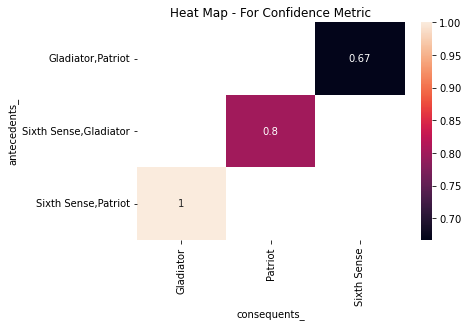

In [10]:
rules_ap['antecedents_'] = rules_ap['antecedents'].apply(lambda a: ','.join(list(a)))
rules_ap['consequents_'] = rules_ap['consequents'].apply(lambda a: ','.join(list(a)))

pivot = rules_ap[rules_ap['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'confidence')

sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [11]:
rules_ap_li = association_rules(frequent_itemsets_ap, metric="lift", min_threshold=0.8)
print(rules_ap_li.shape)

(16, 9)


In [12]:
rules_ap_li['lhs items'] = rules_ap_li['antecedents'].apply(lambda x:len(x) )
rules_ap_li[rules_ap_li['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
11,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,2
10,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,2
12,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,2


(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'Gladiator'),
  Text(1.5, 0, 'Patriot'),
  Text(2.5, 0, 'Sixth Sense')])

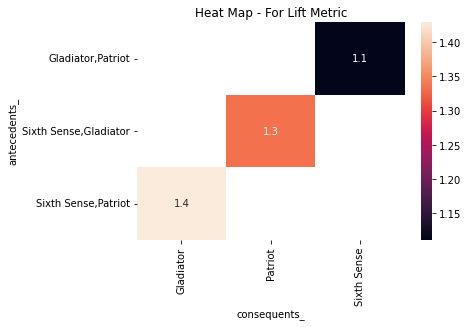

In [13]:
rules_ap_li['antecedents_'] = rules_ap_li['antecedents'].apply(lambda a: ','.join(list(a)))
rules_ap_li['consequents_'] = rules_ap_li['consequents'].apply(lambda a: ','.join(list(a)))

pivot = rules_ap_li[rules_ap_li['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')

sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Lift Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [14]:
frequent_itemsets_fp=fpgrowth(num_movie, min_support=0.1, use_colnames=True,verbose=1)
print(frequent_itemsets_fp.shape)

10 itemset(s) from tree conditioned on items ()
3 itemset(s) from tree conditioned on items (Sixth Sense)
3 itemset(s) from tree conditioned on items (Green Mile)
3 itemset(s) from tree conditioned on items (LOTR2)
7 itemset(s) from tree conditioned on items (Harry Potter1)
15 itemset(s) from tree conditioned on items (LOTR1)
0 itemset(s) from tree conditioned on items (Gladiator)
1 itemset(s) from tree conditioned on items (Patriot)
3 itemset(s) from tree conditioned on items (Braveheart)
1 itemset(s) from tree conditioned on items (Harry Potter2)
7 itemset(s) from tree conditioned on items (LOTR)
(53, 2)


C:\Games\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [15]:
frequent_itemsets_fp.sort_values("support", ascending = False).head()

,support,itemsets
5,0.7,(Gladiator)
0,0.6,(Sixth Sense)
41,0.6,"(Gladiator, Patriot)"
6,0.6,(Patriot)
10,0.5,"(Sixth Sense, Gladiator)"


In [16]:
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.8)
print(rules_fp.head())

                antecedents    consequents  antecedent support  \
0             (Sixth Sense)    (Gladiator)                 0.6   
1  (Sixth Sense, Gladiator)      (Patriot)                 0.5   
2    (Sixth Sense, Patriot)    (Gladiator)                 0.4   
3              (Green Mile)  (Sixth Sense)                 0.2   
4   (Green Mile, Gladiator)  (Sixth Sense)                 0.1   

   consequent support  support  confidence      lift  leverage  conviction  
0                 0.7      0.5    0.833333  1.190476      0.08         1.8  
1                 0.6      0.4    0.800000  1.333333      0.10         2.0  
2                 0.7      0.4    1.000000  1.428571      0.12         inf  
3                 0.6      0.2    1.000000  1.666667      0.08         inf  
4                 0.6      0.1    1.000000  1.666667      0.04         inf  


In [17]:
rules_fp[(rules_fp.support > 0.1) & (rules_fp.confidence > 0.4)].sort_values("confidence", ascending = False).shape

(8, 9)

In [18]:
rules_fp['lhs items'] = rules_fp['antecedents'].apply(lambda x:len(x) )
rules_fp[rules_fp['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
83,"(Sixth Sense, LOTR2, Harry Potter1)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf,3
87,"(LOTR1, Sixth Sense, Green Mile)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,3
85,"(Green Mile, LOTR2, Harry Potter1)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,3
84,"(Sixth Sense, Green Mile, LOTR2)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,3
82,"(LOTR1, Green Mile, LOTR2)","(Sixth Sense, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,3


(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5]),
 [Text(0.5, 0, 'Gladiator'),
  Text(2.5, 0, 'Green Mile,Gladiator'),
  Text(4.5, 0, 'Green Mile,LOTR2'),
  Text(6.5, 0, 'Harry Potter1'),
  Text(8.5, 0, 'LOTR1'),
  Text(10.5, 0, 'LOTR1,Green Mile,Harry Potter1'),
  Text(12.5, 0, 'LOTR1,Harry Potter1'),
  Text(14.5, 0, 'LOTR1,Sixth Sense'),
  Text(16.5, 0, 'LOTR1,Sixth Sense,Harry Potter1'),
  Text(18.5, 0, 'LOTR2'),
  Text(20.5, 0, 'Patriot'),
  Text(22.5, 0, 'Sixth Sense,Gladiator'),
  Text(24.5, 0, 'Sixth Sense,Green Mile,LOTR2'),
  Text(26.5, 0, 'Sixth Sense,LOTR'),
  Text(28.5, 0, 'Sixth Sense,LOTR2,Harry Potter1')])

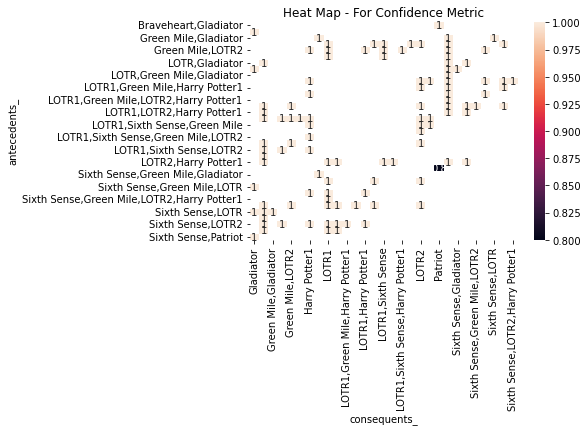

In [19]:
rules_fp['antecedents_'] = rules_fp['antecedents'].apply(lambda a: ','.join(list(a)))
rules_fp['consequents_'] = rules_fp['consequents'].apply(lambda a: ','.join(list(a)))

pivot = rules_fp[rules_fp['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'confidence')

sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [20]:
rules_fp_li = association_rules(frequent_itemsets_fp, metric="lift", min_threshold=0.8)
print(rules_fp_li.shape)

(246, 9)


In [21]:
rules_fp_li['lhs items'] = rules_fp_li['antecedents'].apply(lambda x:len(x) )
rules_fp_li[rules_fp_li['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
172,"(Sixth Sense, LOTR2, Harry Potter1)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf,3
58,"(Green Mile, Harry Potter1)","(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf,2
176,"(LOTR1, Sixth Sense, Green Mile)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,3
175,"(LOTR1, Sixth Sense, Harry Potter1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf,3
174,"(Green Mile, LOTR2, Harry Potter1)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,3


(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5, 30.5, 32.5]),
 [Text(0.5, 0, 'Braveheart'),
  Text(2.5, 0, 'Green Mile'),
  Text(4.5, 0, 'Green Mile,Harry Potter1'),
  Text(6.5, 0, 'Green Mile,LOTR2,Harry Potter1'),
  Text(8.5, 0, 'LOTR'),
  Text(10.5, 0, 'LOTR,Green Mile'),
  Text(12.5, 0, 'LOTR1,Green Mile'),
  Text(14.5, 0, 'LOTR1,Green Mile,LOTR2'),
  Text(16.5, 0, 'LOTR1,LOTR2'),
  Text(18.5, 0, 'LOTR1,Sixth Sense'),
  Text(20.5, 0, 'LOTR1,Sixth Sense,Harry Potter1'),
  Text(22.5, 0, 'LOTR2'),
  Text(24.5, 0, 'Patriot'),
  Text(26.5, 0, 'Sixth Sense,Gladiator'),
  Text(28.5, 0, 'Sixth Sense,Green Mile,Harry Potter1'),
  Text(30.5, 0, 'Sixth Sense,Harry Potter1'),
  Text(32.5, 0, 'Sixth Sense,LOTR2')])

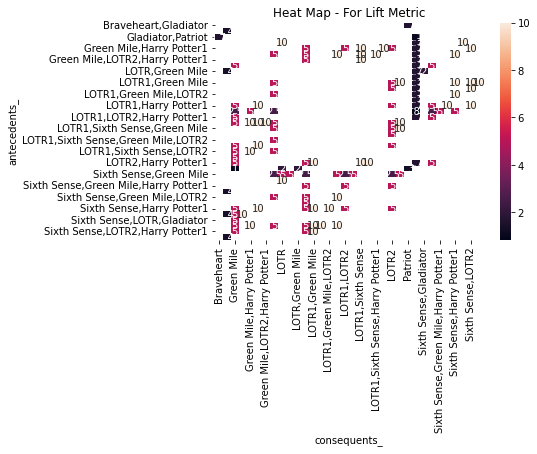

In [22]:
rules_fp_li['antecedents_'] = rules_fp_li['antecedents'].apply(lambda a: ','.join(list(a)))
rules_fp_li['consequents_'] = rules_fp_li['consequents'].apply(lambda a: ','.join(list(a)))

pivot = rules_fp_li[rules_fp_li['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')

sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Lift Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)